In [4]:
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt

from pathlib import Path


# Helper Functions to get data etc

In [5]:
dir_path = Path(os.getcwd())
data_dir = str(os.path.join(dir_path,'data'))
balance_files = glob.glob(data_dir + "/poker_balances*.csv")
hands_files = glob.glob(data_dir + "/poker_hands*.csv")
table_files = glob.glob(data_dir + "/poker_table_info*.csv")

def get_hands_df():
    hands_dfs=[]

    for file in hands_files:
        new_df = pd.read_csv(file)
        hands_dfs.append(new_df)

    hands = pd.concat(hands_dfs)
    return hands
    
def get_games_df():
    balance_dfs=[]
    
    for file in balance_files:
        new_df = pd.read_csv(file)
        balance_dfs.append(new_df)
        
    balances = pd.concat(balance_dfs)
    return balances

def get_table_df():
    table_dfs=[]
    
    for file in table_files:
        new_df = pd.read_csv(file)
        table_dfs.append(new_df)
        
    tables = pd.concat(table_dfs)
    return tables


## Getting Data - games, tables and hands

In [6]:
pd.set_option('display.max_columns', None)  
hands_base = get_hands_df()
games_base = get_games_df()
tables = get_table_df()

games = pd.merge(games_base,tables)
hands = pd.merge(hands_base,games)

ValueError: No objects to concatenate

## Samples of Data

In [12]:
tables.head(5)

,table_id,scenario_name,player_types
0,1,smart vs 1 all call player,AlwaysCallPlayer|SmartPlayer
0,10,smart vs 1 all call player,AlwaysCallPlayer|SmartPlayer
0,11,smart vs 2 all call player,AlwaysCallPlayer|AlwaysCallPlayer|SmartPlayer
0,12,smart vs 2 all call player,AlwaysCallPlayer|AlwaysCallPlayer|SmartPlayer
0,13,smart vs 2 all call player,AlwaysCallPlayer|AlwaysCallPlayer|SmartPlayer


In [13]:
games.head(5)

,table_id,game_id,player_name,player_type,game_result,game_reason,blind_type,final_hand,beginning_balance,game_start_balance,game_end_balance,game_net_change,scenario_name,player_types
0,1,1,players_1,SmartPlayer,lost,lost_game,small,one_pair,100000,100000.0,99990.0,-10.0,smart vs 1 all call player,AlwaysCallPlayer|SmartPlayer
1,1,2,players_1,SmartPlayer,won,won_game,big,one_pair,100000,99990.0,100000.0,10.0,smart vs 1 all call player,AlwaysCallPlayer|SmartPlayer
2,1,3,players_1,SmartPlayer,won,won_game,small,straight,100000,100000.0,100210.0,210.0,smart vs 1 all call player,AlwaysCallPlayer|SmartPlayer
3,1,4,players_1,SmartPlayer,lost,fold,big,straight,100000,100210.0,100200.0,-10.0,smart vs 1 all call player,AlwaysCallPlayer|SmartPlayer
4,1,5,players_1,SmartPlayer,won,won_game,small,full_house,100000,100200.0,100310.0,110.0,smart vs 1 all call player,AlwaysCallPlayer|SmartPlayer


In [14]:
hands.head(5)

,table_id,game_id,player_name,player_type,bet_number,opponents,call,current,final,pot,allowed,hand1,hand2,community1,community2,community3,community4,community5,game_result,game_reason,blind_type,final_hand,beginning_balance,game_start_balance,game_end_balance,game_net_change,scenario_name,player_types
0,1,1,players_1,SmartPlayer,1,1,5,5,10.0,15,True,4-diamonds,Q-diamonds,Z-N/A,Z-N/A,Z-N/A,Z-N/A,Z-N/A,lost,lost_game,small,one_pair,100000,100000.0,99990.0,-10.0,smart vs 1 all call player,AlwaysCallPlayer|SmartPlayer
1,1,1,players_1,SmartPlayer,2,1,0,10,10.0,20,True,4-diamonds,Q-diamonds,5-clubs,6-hearts,8-spades,Z-N/A,Z-N/A,lost,lost_game,small,one_pair,100000,100000.0,99990.0,-10.0,smart vs 1 all call player,AlwaysCallPlayer|SmartPlayer
2,1,1,players_1,SmartPlayer,3,1,0,10,10.0,20,True,4-diamonds,Q-diamonds,5-clubs,6-hearts,8-spades,K-spades,Z-N/A,lost,lost_game,small,one_pair,100000,100000.0,99990.0,-10.0,smart vs 1 all call player,AlwaysCallPlayer|SmartPlayer
3,1,1,players_1,SmartPlayer,4,1,0,10,10.0,20,True,4-diamonds,Q-diamonds,5-clubs,6-hearts,8-spades,K-hearts,K-spades,lost,lost_game,small,one_pair,100000,100000.0,99990.0,-10.0,smart vs 1 all call player,AlwaysCallPlayer|SmartPlayer
4,1,2,players_1,SmartPlayer,1,1,0,10,10.0,20,True,J-spades,Q-hearts,Z-N/A,Z-N/A,Z-N/A,Z-N/A,Z-N/A,won,won_game,big,one_pair,100000,99990.0,100000.0,10.0,smart vs 1 all call player,AlwaysCallPlayer|SmartPlayer


# Basic Game Statistics

Number of Games played in the simulation

In [163]:
player_final_hands = hands.query('community5 != "Z-N/A"').groupby(['table_id','game_id','player_name','hand1','hand2','community1','community2','community3','community4','community5','final_hand']).count().game_result.reset_index().groupby('final_hand').game_id.count().reset_index()
player_final_hands_type, player_final_hands_type_numbers = list(zip(*player_final_hands.values))
player_final_hands_type = ['player_final_hand_' + card for card in player_final_hands_type]

winning_hands = games.query('game_result == "won"').groupby(['game_id','final_hand']).count().groupby('final_hand').count().reset_index()[['final_hand','table_id']]
winning_hand_type, winning_hand_type_numbers = list(zip(*winning_hands.values))
winning_hand_type = ['won_by_' + card for card in winning_hand_type]

simulation_overview = pd.DataFrame(
    data={
            "Metric":[
                "scenarios",
                "player strategies",
                "active players",
                "player - bet decisions",
                "tables",
                "games", 
                "average chip gain/loss",
                "average pot size",
                "unique 2-card combos",
                "unique end combos",
                "unique 3-card flops",
                "unique 4-card flops",
                "unique 5-card flops"
            ] + list(player_final_hands_type) +
                list(winning_hand_type),
            "Total":[
                tables.scenario_name.nunique(),
                games.player_type.nunique(),
                games.groupby(['table_id','player_name']).game_result.count().reset_index().shape[0],
                hands.shape[0],
                tables.table_id.nunique(),
                games.game_id.nunique(),
                round(games.game_net_change.mean(),0),
                round(hands.pot.mean(),0),
                hands.groupby(['hand1','hand2']).count().reset_index().shape[0],
                hands.query('community5 != "Z-N/A"').groupby(['hand1','hand2','community1','community2','community3','community4','community5']).count().reset_index().shape[0],
                hands.query('community1 != "Z-N/A"').groupby(['community1','community2','community3']).count().reset_index().shape[0],
                hands.query('community4 != "Z-N/A"').groupby(['community1','community2','community3','community4']).count().reset_index().shape[0],
                hands.query('community5 != "Z-N/A"').groupby(['community1','community2','community3','community4','community5']).count().reset_index().shape[0]
            ] + list(player_final_hands_type_numbers) +
                list(winning_hand_type_numbers)
    },
    columns = ['Metric','Total']
)

simulation_overview

,Metric,Total
0,scenarios,5.0
1,player strategies,2.0
2,active players,200.0
3,player - bet decisions,97818.0
4,tables,50.0
5,games,5000.0
6,average chip gain/loss,-0.0
7,average pot size,556.0
8,unique 2-card combos,1326.0
9,unique end combos,16823.0


In [136]:
end_game_hands

,final_hand,table_id
0,flush,374
1,four_of_kind,29
2,full_house,408
3,high_card,124
4,one_pair,1430
5,straight,532
6,straight_flush,5
7,three_of_kind,482
8,two_pair,1616


In [15]:
time_series = games[['scenario_name','player_name','player_type','table_id','game_id','game_end_balance']]
time_series['game_id'] = (time_series['game_id'] - 1) % 100
time_series['table_id'] = (time_series['table_id'] - 1) % 10
time_series = time_series.pivot_table(index=['scenario_name','player_name','player_type','table_id'],columns=['game_id'],values='game_end_balance').reset_index()
time_series

c:\users\silbe\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\silbe\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


game_id,scenario_name,player_name,player_type,table_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,smart vs 1 all call player,players_1,SmartPlayer,0,99990.0,100000.0,100210.0,100200.0,100310.0,100300.0,100090.0,100100.0,100090.0,100080.0,100070.0,100480.0,100490.0,100480.0,100590.0,100580.0,100590.0,100580.0,100570.0,100560.0,100550.0,101160.0,101170.0,101580.0,101690.0,101680.0,101890.0,102500.0,102490.0,102480.0,102470.0,102460.0,102250.0,102240.0,102230.0,102740.0,102730.0,102720.0,102710.0,102700.0,102690.0,102680.0,102670.0,102660.0,102650.0,102640.0,102650.0,102660.0,102650.0,102640.0,102630.0,102640.0,102630.0,102620.0,102610.0,102600.0,102610.0,103220.0,103210.0,103200.0,103190.0,103180.0,103170.0,103160.0,103150.0,103140.0,103250.0,103240.0,103250.0,103250.0,103240.0,103230.0,103120.0,103110.0,103100.0,103110.0,103100.0,103090.0,103080.0,103070.0,103060.0,103050.0,103040.0,103030.0,103020.0,103430.0,103320.0,103310.0,103300.0,103290.0,103280.0,103270.0,103260.0,103250.0,103240.0,103230.0,103220.0,103730.0,103620.0,103610.0
1,smart vs 1 all call player,players_1,SmartPlayer,1,99990.0,100400.0,100390.0,101000.0,100990.0,101600.0,101590.0,102400.0,102390.0,102380.0,102370.0,102160.0,102150.0,101740.0,102050.0,102660.0,102670.0,102660.0,102870.0,102880.0,102870.0,102860.0,102870.0,102860.0,102850.0,103060.0,103050.0,103040.0,103030.0,103020.0,103330.0,103740.0,103750.0,103760.0,103770.0,103760.0,104070.0,103860.0,103870.0,103860.0,104070.0,104060.0,104050.0,104260.0,104570.0,104580.0,104570.0,104560.0,104550.0,104540.0,104850.0,104840.0,104830.0,104820.0,104810.0,105420.0,105410.0,105520.0,105510.0,105500.0,105490.0,105480.0,105470.0,105880.0,105770.0,105980.0,105970.0,105960.0,105970.0,105960.0,106270.0,107080.0,107070.0,107280.0,107070.0,107680.0,107670.0,107660.0,107650.0,107540.0,107230.0,107220.0,107210.0,107620.0,107610.0,107600.0,107610.0,108220.0,108210.0,108100.0,107790.0,108000.0,108010.0,108220.0,108330.0,108340.0,108330.0,108220.0,108010.0,108220.0
2,smart vs 1 all call player,players_1,SmartPlayer,2,99990.0,99980.0,100190.0,100180.0,100170.0,100180.0,100590.0,101200.0,101510.0,101520.0,101630.0,101620.0,101930.0,101920.0,101910.0,101900.0,102110.0,102320.0,102310.0,102620.0,102620.0,102010.0,102000.0,101990.0,101880.0,101870.0,102080.0,102070.0,102060.0,102050.0,102040.0,102030.0,102040.0,102850.0,102840.0,102830.0,102820.0,102810.0,102800.0,102790.0,102780.0,102770.0,103080.0,103070.0,103060.0,103050.0,103040.0,103250.0,103260.0,102550.0,102540.0,102530.0,102520.0,103130.0,103240.0,103850.0,103860.0,104070.0,104060.0,104670.0,104980.0,105390.0,105380.0,105370.0,105360.0,105350.0,105360.0,105350.0,105340.0,105330.0,105120.0,105130.0,105120.0,105110.0,105100.0,105090.0,105400.0,105390.0,105380.0,105370.0,105060.0,105050.0,105040.0,105030.0,105020.0,105010.0,105000.0,104790.0,104780.0,104770.0,105080.0,105070.0,105060.0,105050.0,105060.0,105270.0,105380.0,105370.0,105260.0,105250.0
3,smart vs 1 all call player,players_1,SmartPlayer,3,99990.0,99980.0,99990.0,100600.0,100610.0,100620.0,100630.0,100620.0,100610.0,100620.0,100610.0,100620.0,100620.0,100610.0,100920.0,101430.0,101440.0,101850.0,101840.0,101830.0,102240.0,102250.0,102360.0,102150.0,102260.0,102250.0,102240.0,102850.0,102540.0,102750.0,102760.0,102750.0,102760.0,102750.0,103060.0,103670.0,103880.0,103870.0,103660.0,104270.0,104260.0,104970.0,105180.0,105890.0,106000.0,105990.0,106100.0,106090.0,106400.0,106810.0,106800.0,107410.0,107400.0,107390.0,107380.0,107370.0,107370.0,108080.0,108090.0,108500.0,108390.0,108380.0,108490.0,108500.0,108490.0,108480.0,108790.0,108800.0,109110.0,109100.0,108790.0,108780.0,108770.0,108780.0,108770.0,108780.0,108990.0,108980.0,108970.0,109380.0,109690.0,109800.0,109910.0,109

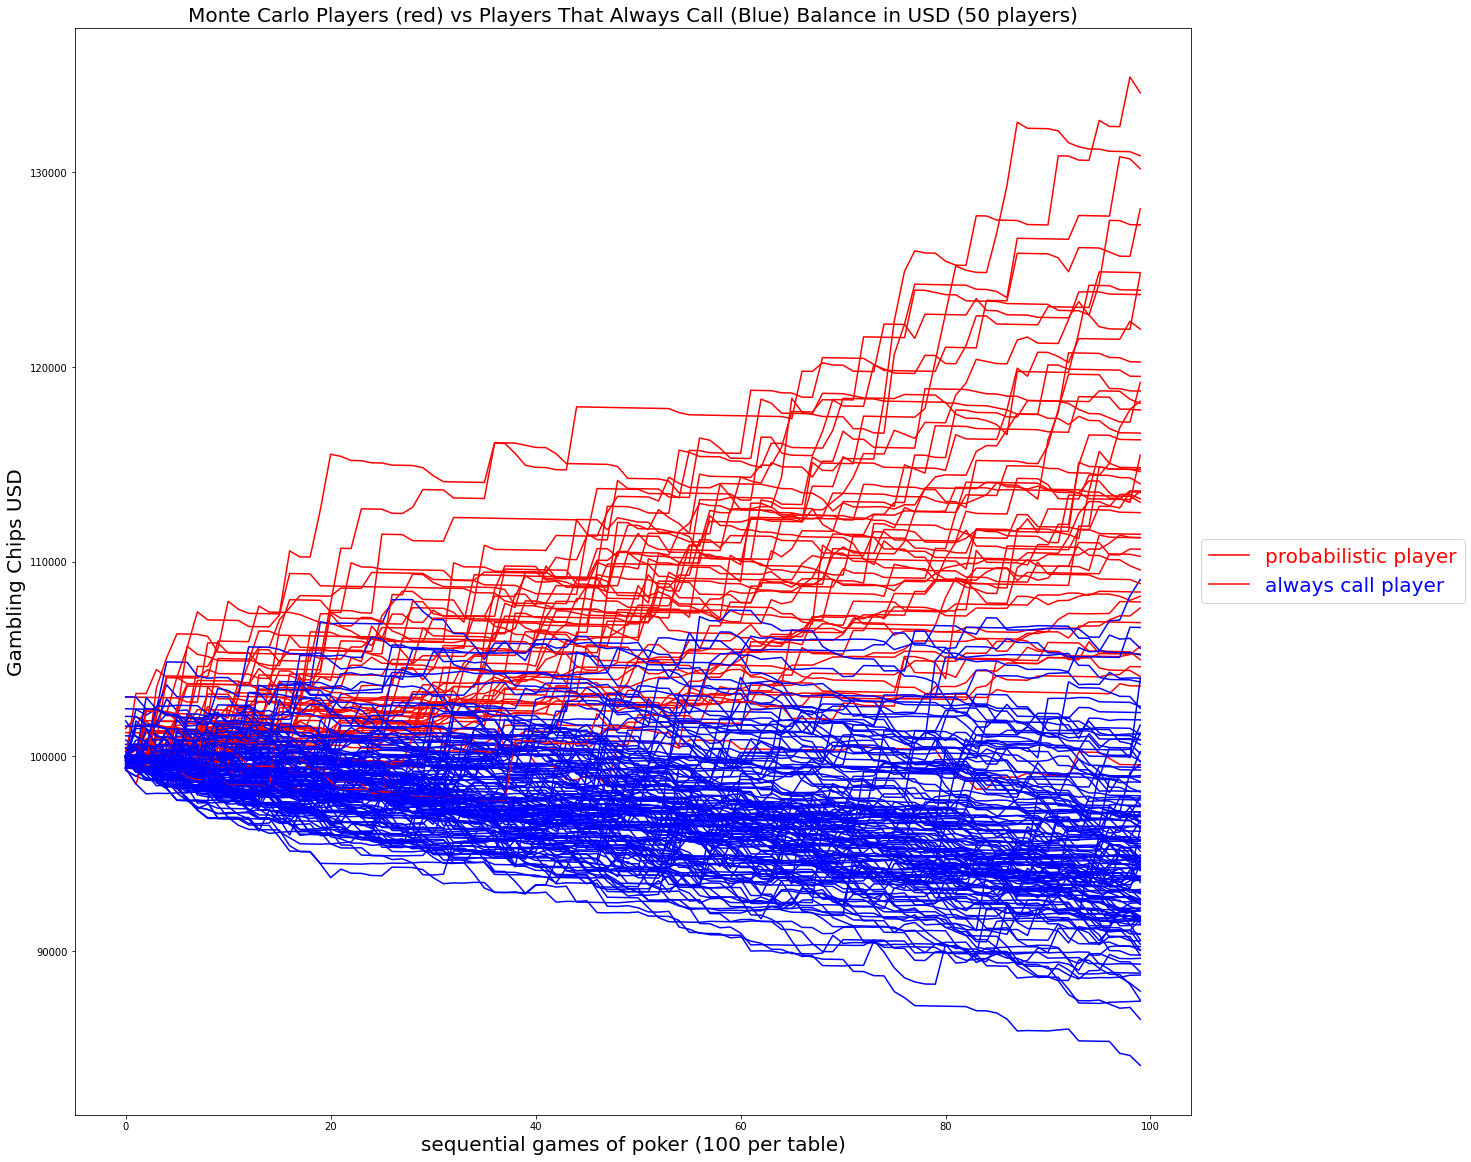

In [16]:
player_type = time_series[['player_type'] + [col for col in time_series.columns if isinstance(col,int)]]
colors = player_type['player_type'].apply(lambda x: 'r' if x == 'SmartPlayer' else 'b')

f = plt.figure()
player_type.set_index('player_type').T.plot(color = colors,ax=f.gca(),figsize=(20, 20))
plt.title('Monte Carlo Players (red) vs Players That Always Call (Blue) Balance in USD (50 players)', color='black',size = 20)
plt.ylabel('Gambling Chips USD', size = 20)
plt.xlabel('sequential games of poker (100 per table)', size = 20)
plt.legend(['probabilistic player','always call player'],labelcolor=['r','b'], loc='center left', bbox_to_anchor=(1.0, 0.5),prop={'size': 20})
